#  Project Overview

SyriaTel is a telecommunications service provider that operates across the globe including USA 
among other coutries. In the telecommunications industry, people often switch from one service provider
to another. This change in taste and prefrence is what we refer to as churning. SyriaTel is no 
exeption to this. Through their data, we can be able to understand the pattern behind customer
churning and therefore SyriaTel and other companies in the industry will be able to anticipate 
customers who are likely to leave. 



# Business and data understanding

In order to carry out our task sufficiently, we first need an understanding of the business problem and to further understand the data that we will be using

## Business understanding

The problem at hand is customer churning which has a negative outlook on the fincances of the business. When customers 
keep leaving suddenly then you are unable to have an accurate finacnial long term plan for the business because without a forecst on the number of customers you'll retain or lose then you can't plan well. Therefore through developing a model, we can be able to anticipate future churning and therefore save the business alot of money

## Data Understanding

From kaggle.com, we have been able to get a dataset that contains the following details for each customer:

- **state**: The geographical location where the customer is residing.
- **account length**: The duration, measured in days, for which the customer has held their account.
- **area code**: The numeric code associated with the customer's phone number's geographical area.
- **phone number**: The unique phone number of the customer.
- **international plan**: A binary indicator for whether the customer has an international calling plan.
- **voice mail plan**: A binary indicator for whether the customer has a voice mail plan.
- **number vmail messages**: The count of voicemail messages the customer has sent or received.
- **total day minutes**: The total minutes the customer has spent on calls during the daytime.
- **total day calls**: The total number of calls the customer has made during the daytime.
- **total day charge**: The total monetary cost incurred by the customer for daytime calls.
- **total eve minutes**: The total minutes the customer has spent on calls during the evening.
- **total eve calls**: The total number of calls the customer has made during the evening.
- **total eve charge**: The total monetary cost incurred by the customer for evening calls.
- **total night minutes**: The total minutes the customer has spent on calls during the nighttime.
- **total night calls**: The total number of calls the customer has made during the nighttime.
- **total night charge**: The total monetary cost incurred by the customer for nighttime calls.
- **total intl minutes**: The total minutes the customer has spent on international calls.
- **total intl calls**: The total number of international calls the customer has initiated.
- **total intl charge**: The total monetary cost incurred by the customer for international calls.
- **customer service calls**: The count of calls the customer has placed to the customer service department.
- **churn**: A binary indicator for whether the customer has terminated their contract.


# Data Processing

With That let us start the analysis process 

## Exploring the data

In [87]:
#importing all the relevant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [89]:
#Reading the data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [54]:
#let's take a look at our data
pd.set_option('display.max_columns',None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


I find the seperated day, evening and night calls confusing so let's deal with this buy getting the total for each day 
then dropping the initial columns

In [55]:
#Let's add the new columns 
df['Total_minutes']=df['total day minutes']+df['total eve minutes']+df['total night minutes']
df['Total_calls']=df['total day calls'] + df['total eve calls']+df['total night calls']
df['Total_charge']=df['total day charge'] + df['total eve charge']+ df['total night charge']

#Let's now drop the redundant columns
columns_to_drop = ['total day minutes', 'total eve minutes', 'total night minutes', 
                   'total day calls', 'total eve calls', 'total night calls', 
                   'total day charge', 'total eve charge', 'total night charge']

df = df.drop(columns=columns_to_drop)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total_minutes,Total_calls,Total_charge
0,KS,128,415,382-4657,no,yes,25,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,358-1921,no,no,0,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,375-9999,yes,no,0,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,330-6626,yes,no,0,10.1,3,2.73,3,False,501.9,356,49.36


In [56]:
#Lets get more information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total intl minutes      3333 non-null   float64
 8   total intl calls        3333 non-null   int64  
 9   total intl charge       3333 non-null   float64
 10  customer service calls  3333 non-null   int64  
 11  churn                   3333 non-null   bool   
 12  Total_minutes           3333 non-null   float64
 13  Total_calls             3333 non-null   int64  
 14  Total_charge            3333 non-null   

In [57]:
df.shape

(3333, 15)

In [58]:
#There are no null values as observed below
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
Total_minutes             0
Total_calls               0
Total_charge              0
dtype: int64

In [59]:
df.describe()

,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,Total_minutes,Total_calls,Total_charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,10.237294,4.479448,2.764581,1.562856,581.627483,300.657666,56.685173
std,39.822106,42.371290,13.688365,2.791840,2.461214,0.753773,1.315491,89.969330,34.328232,10.487816
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000,188.000000,19.980000
25%,74.000000,408.000000,0.000000,8.500000,3.000000,2.300000,1.000000,521.000000,278.000000,49.590000
50%,101.000000,415.000000,0.000000,10.300000,4.000000,2.780000,1.000000,583.100000,301.000000,56.630000
75%,127.000000,510.000000,20.000000,12.100000,6.000000,3.270000,2.000000,642.500000,324.000000,63.650000
max,243.000000,510.000000,51.000000,20.000000,20.000000,5.400000,9.000000,876.900000,410.000000,92.560000


## Data visualizations

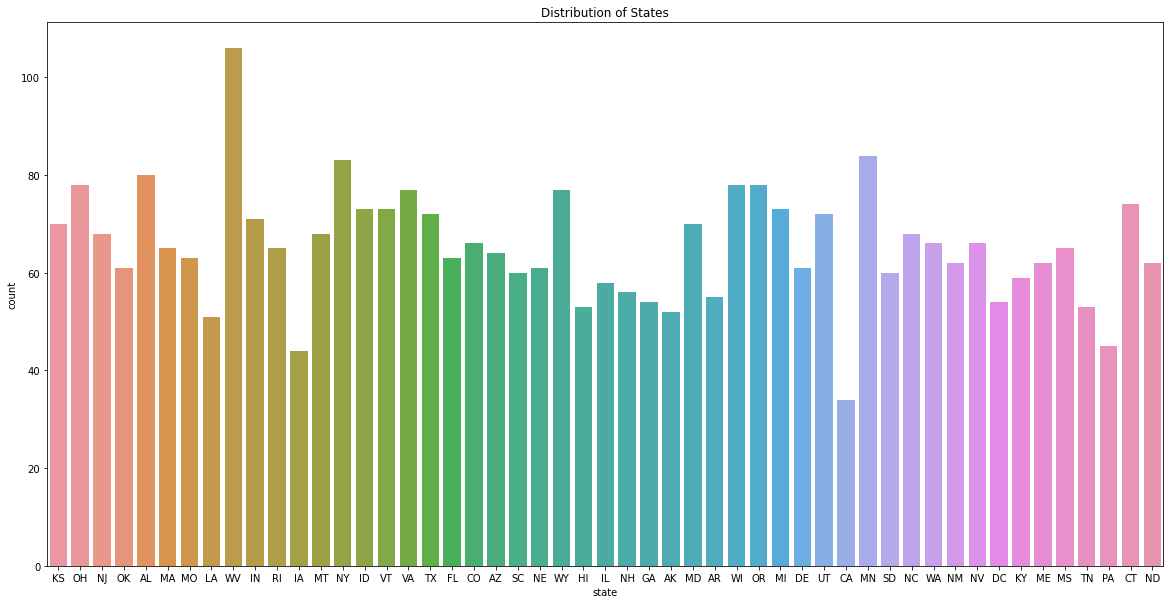

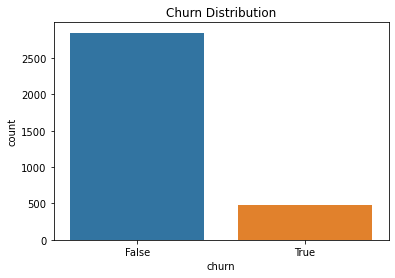

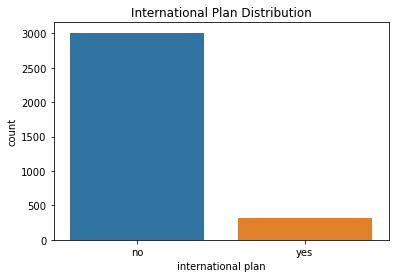

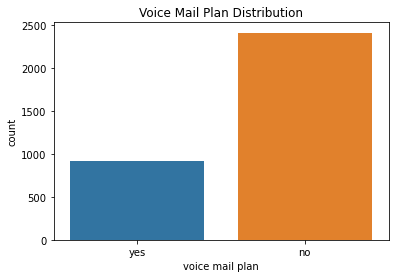

In [60]:
# Bar Charts for Categorical Variables
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='state')
plt.title('Distribution of States')
plt.show()

sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.show()

sns.countplot(data=df, x='international plan')
plt.title('International Plan Distribution')
plt.show()

sns.countplot(data=df, x='voice mail plan')
plt.title('Voice Mail Plan Distribution')
plt.show()

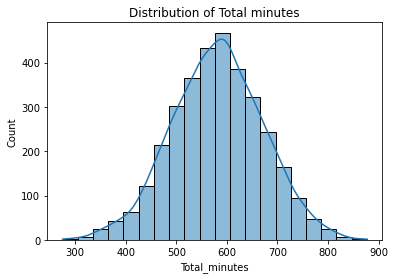

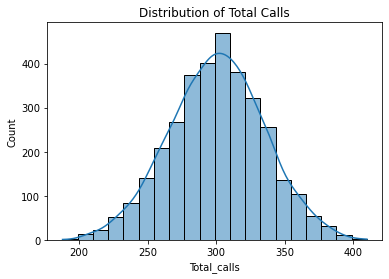

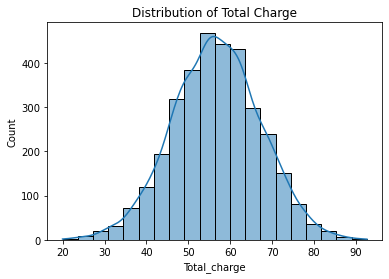

In [61]:
# Histograms for local timings Variables
sns.histplot(data=df, x='Total_minutes', bins=20, kde=True)
plt.title('Distribution of Total minutes')
plt.show()

sns.histplot(data=df, x='Total_calls', bins=20, kde=True)
plt.title('Distribution of Total Calls')
plt.show()

sns.histplot(data=df, x='Total_charge', bins=20, kde=True)
plt.title('Distribution of Total Charge')
plt.show()



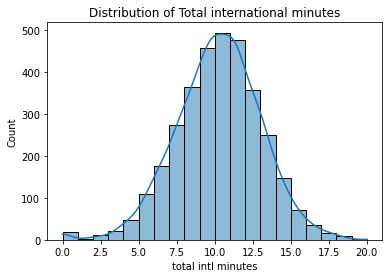

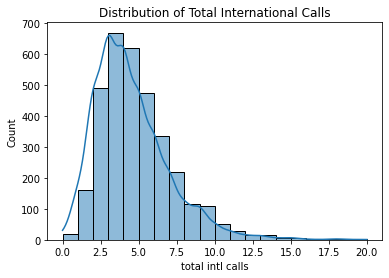

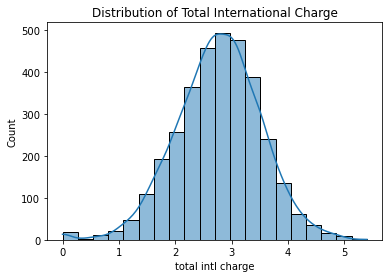

In [62]:
# Histograms for international timings 
sns.histplot(data=df, x='total intl minutes', bins=20, kde=True)
plt.title('Distribution of Total international minutes')
plt.show()
sns.histplot(data=df, x='total intl calls', bins=20, kde=True)
plt.title('Distribution of Total International Calls')
plt.show()

sns.histplot(data=df, x='total intl charge', bins=20, kde=True)
plt.title('Distribution of Total International Charge')
plt.show()


With a mean of 4.479448, we see that the Distribution of total international calls is skewd to left thus it may require
some normalization

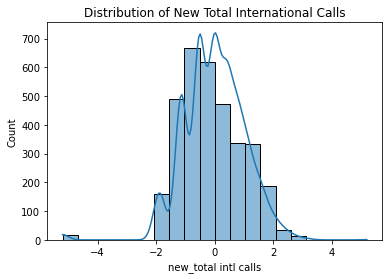

In [63]:
#import library for normalization
from sklearn.preprocessing import PowerTransformer, QuantileTransformer


column_to_transform = 'total intl calls'

# Using PowerTransformer
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
df['new_total intl calls (Power)'] = power_transformer.fit_transform(df[[column_to_transform]])

# Using QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
df['new_total intl calls'] = quantile_transformer.fit_transform(df[[column_to_transform]])

sns.histplot(data=df, x='new_total intl calls', bins=20, kde=True)
plt.title('Distribution of New Total International Calls')
plt.show()

#That looks much better, now let's replace the data
df['total intl calls'] = df['new_total intl calls']
columns_to_drop = ['new_total intl calls', 'new_total intl calls (Power)']
df = df.drop(columns=columns_to_drop)


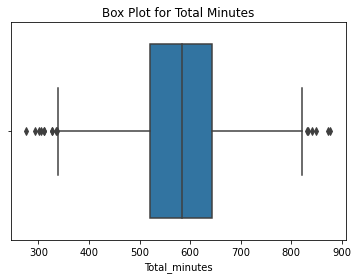

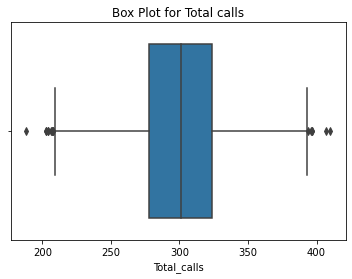

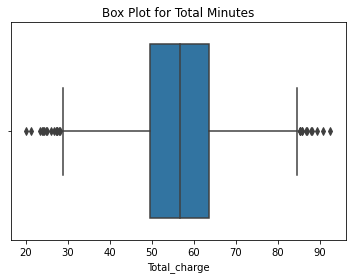

In [64]:
# Box Plot for 'total  minutes'
sns.boxplot(data=df, x='Total_minutes')
plt.title('Box Plot for Total Minutes')
plt.show()

sns.boxplot(data=df, x='Total_calls')
plt.title('Box Plot for Total calls')
plt.show()

sns.boxplot(data=df, x='Total_charge')
plt.title('Box Plot for Total Minutes')
plt.show()

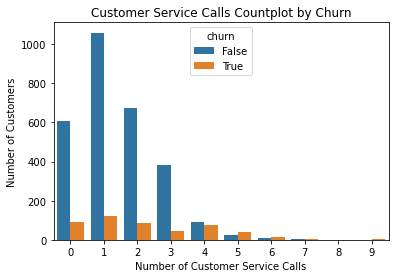

In [65]:
# Understanding customer service calls and churn

sns.countplot(data=df, x='customer service calls', hue='churn')
plt.xlabel("Number of Customer Service Calls")
plt.ylabel("Number of Customers")
plt.title("Customer Service Calls Countplot by Churn")
plt.show()

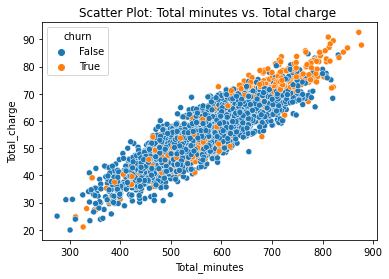

In [66]:
# Scatter Plot
sns.scatterplot(data=df, x='Total_minutes', y='Total_charge', hue='churn')
plt.title('Scatter Plot: Total minutes vs. Total charge ')
plt.show()

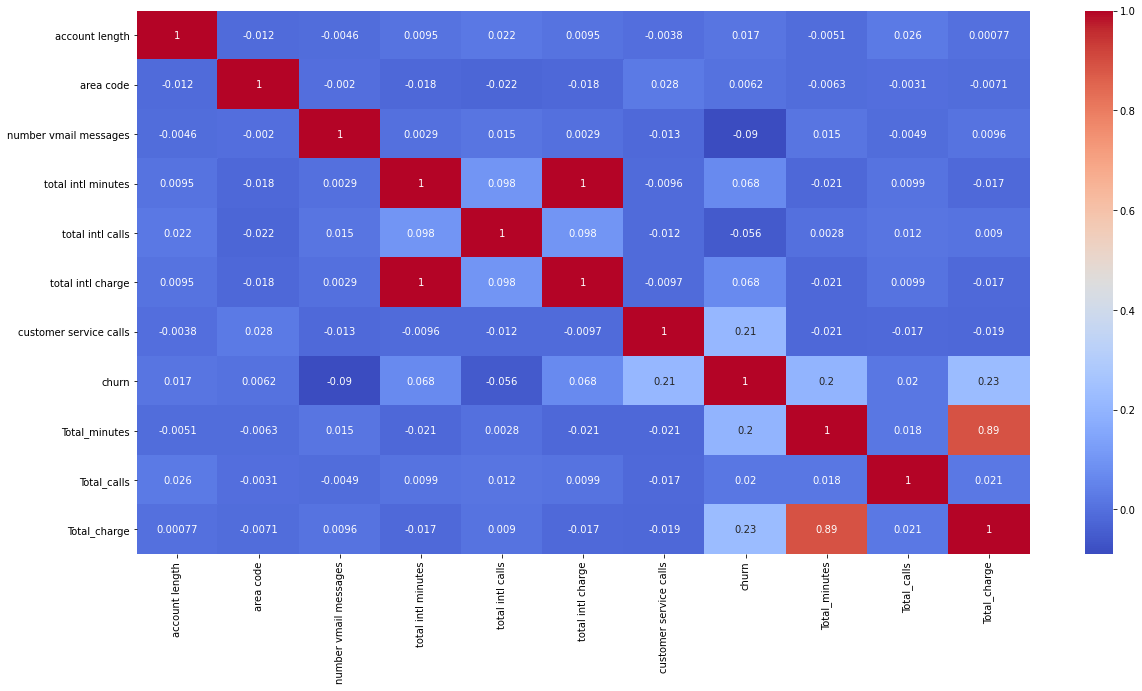

In [67]:
# Correlation Matrix and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Modeling and Evaluation

## Data Preparation

In [68]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total_minutes,Total_calls,Total_charge
0,KS,128,415,382-4657,no,yes,25,10.0,-0.524976,2.70,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,13.7,-0.524976,3.70,1,False,611.5,329,55.54
2,NJ,137,415,358-1921,no,no,0,12.2,0.404717,3.29,0,False,527.2,328,59.00
3,OH,84,408,375-9999,yes,no,0,6.6,1.088723,1.78,2,False,558.2,248,65.02
4,OK,75,415,330-6626,yes,no,0,10.1,-0.524976,2.73,3,False,501.9,356,49.36


In [69]:
#preparing the data
y = df['churn']
X = df.drop(columns='churn')
categorical_data = ['state','area code','international plan','voice mail plan']
#spliting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [70]:
# Dealing with categorical data
X_train_categorical=X_train[categorical_data].copy()
X_test_categorical=X_test[categorical_data].copy()
#The phone numbers are categorical but since they are all unique it will only increase the number of columns

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

#lets encode the data from the Xtrain
ohe.fit(X_train_categorical)
X_ohe_train = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)

#lets encode the data from the Xtest
ohe.fit(X_test_categorical)
X_ohe_test = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

y_ohe_train = pd.DataFrame(ohe.fit_transform(y_train.values.reshape(-1, 1)), columns=ohe.get_feature_names(['your_target_column_name']))

# Encode the data from y_test (assuming y_test is a single column)
y_ohe_test = pd.DataFrame(ohe.transform(y_test.values.reshape(-1, 1)), columns=ohe.get_feature_names(['your_target_column_name']))

X_numeric_train = X_train.drop(columns=(categorical_data+['phone number']))
X_numeric_test = X_test.drop(columns=(categorical_data+['phone number']))

#let's normalize the Xtrain numerical data

scaler = MinMaxScaler()
scaler.fit(X_numeric_train)
X_scaled_train = pd.DataFrame(
    scaler.transform(X_numeric_train),
    index=X_numeric_train.index,
    columns=X_numeric_train.columns
)

#let's normalize the Xtest numerical data

scaler = MinMaxScaler()
scaler.fit(X_numeric_test)
X_scaled_test = pd.DataFrame(
    scaler.transform(X_numeric_test),
    index=X_numeric_test.index,
    columns=X_numeric_test.columns
)

#Now to concatinate the two dataframes into one
X_train=pd.concat([X_ohe_train,X_scaled_train],axis =1)
X_test=pd.concat([X_ohe_test,X_scaled_test],axis =1)
y_train=y_ohe_train
y_test=y_ohe_test

# Convert it back to a 1D array
y_train = y_train.iloc[:, 1].values
y_test = y_test.iloc[:, 1].values

## Logistic regression

In [71]:
#let's check for class imbalance
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize = True))

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


In [72]:
#Because of the imbalance we shall use a balanced class weight 

#Fitting the model to the training data

logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight='balanced', solver='liblinear')
model_fit = logreg.fit(X_train,y_train)
model_fit

LogisticRegression(C=1e+20, class_weight='balanced', fit_intercept=False,
                   solver='liblinear')

0.0    0.777911
1.0    0.222089
dtype: float64


Confusion Matrix:
 [[1657  480]
 [  75  287]]


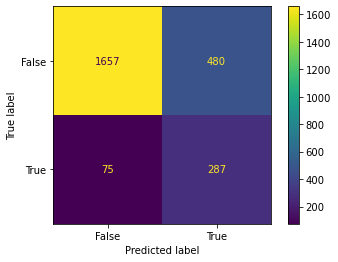

Precision : 0.3741851368970013
Recall : 0.7928176795580111
Accuracy : 0.7779111644657863
f1_score : 0.508414526129318


In [73]:
#evaluating the model on train data
y_hat_train = logreg.predict(X_train)
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals).value_counts(normalize=True))


print('\n')
cf= confusion_matrix(y_train,y_hat_train)
print('Confusion Matrix:\n', cf)
cm = ConfusionMatrixDisplay(confusion_matrix = cf,display_labels = [False, True])
cm.plot()
plt.show()

print(f"Precision : {precision_score(y_train,y_hat_train)}")

print(f"Recall : {recall_score(y_train,y_hat_train)}")

print(f"Accuracy : {accuracy_score(y_train,y_hat_train)}")

print(f"f1_score : {f1_score(y_train,y_hat_train)}")


0.0    0.66307
1.0    0.33693
dtype: float64


Confusion Matrix:
 [[454 259]
 [ 22  99]]


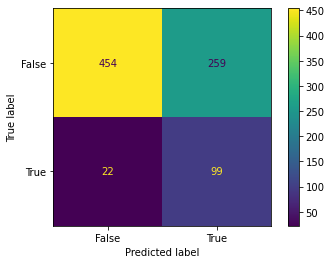

0.0    0.66307
1.0    0.33693
dtype: float64
TPrecision: 0.276536312849162
Recall: 0.8181818181818182
accuracy: 0.6630695443645084
fl_score: 0.41336116910229653


In [74]:
y_hat_test = logreg.predict(X_test)
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals).value_counts(normalize=True))
print('\n')
cf= confusion_matrix(y_test,y_hat_test)
print('Confusion Matrix:\n', cf)
cm = ConfusionMatrixDisplay(confusion_matrix = cf,display_labels = [False, True])
cm.plot()
plt.show()
print(pd.Series(test_residuals).value_counts(normalize=True))
print(f"TPrecision: {precision_score(y_test,y_hat_test)}")
print(f"Recall: {recall_score(y_test,y_hat_test)}")
print(f"accuracy: {accuracy_score(y_test,y_hat_test)}")
print(f"fl_score: {f1_score(y_test,y_hat_test)}")

As we can see the model is not so effecient conidering the high number of false postives and the law accuracy and f1_scores.
Let's tune it using the Grid search hyperparameter

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters and their values to search
param_grid = {
    'fit_intercept': [True, False],
    'C': [1e-2, 1e-1, 1, 1e1, 1e2],
    'class_weight': [None, 'balanced', {1: 100, 0: 1}, {1: 1000, 0: 1}],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Create the logistic regression model
logreg = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, fit_intercept=False, solver='newton-cg')

Train Data


0.0    0.866347
1.0    0.133653
dtype: float64


Confusion Matrix:
 [[2121   16]
 [ 318   44]]


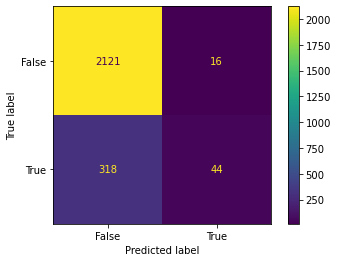

Precision : 0.7333333333333333
Recall : 0.12154696132596685
Accuracy : 0.8663465386154462
f1_score : 0.20853080568720378


Test Data


0.0    0.863309
1.0    0.136691
dtype: float64


Confusion Matrix:
 [[701  12]
 [102  19]]


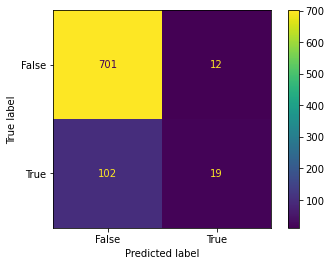

0.0    0.863309
1.0    0.136691
dtype: float64
Precision: 0.6129032258064516
Recall: 0.15702479338842976
accuracy: 0.8633093525179856
fl_score: 0.25


In [76]:
#evaluating the model on train data
y_hat_train = best_logreg.predict(X_train)
train_residuals = np.abs(y_train - y_hat_train)
print('Train Data')
print('\n')
print(pd.Series(train_residuals).value_counts(normalize=True))


print('\n')
cf= confusion_matrix(y_train,y_hat_train)
print('Confusion Matrix:\n', cf)
cm = ConfusionMatrixDisplay(confusion_matrix = cf,display_labels = [False, True])
cm.plot()
plt.show()

print(f"Precision : {precision_score(y_train,y_hat_train)}")

print(f"Recall : {recall_score(y_train,y_hat_train)}")

print(f"Accuracy : {accuracy_score(y_train,y_hat_train)}")

print(f"f1_score : {f1_score(y_train,y_hat_train)}")

print('\n')
print('Test Data')
print('\n')
y_hat_test = best_logreg.predict(X_test)
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals).value_counts(normalize=True))
print('\n')
cf= confusion_matrix(y_test,y_hat_test)
print('Confusion Matrix:\n', cf)
cm = ConfusionMatrixDisplay(confusion_matrix = cf,display_labels = [False, True])
cm.plot()
plt.show()
print(pd.Series(test_residuals).value_counts(normalize=True))
print(f"Precision: {precision_score(y_test,y_hat_test)}")
print(f"Recall: {recall_score(y_test,y_hat_test)}")
print(f"accuracy: {accuracy_score(y_test,y_hat_test)}")
print(f"fl_score: {f1_score(y_test,y_hat_test)}")

As we can see after applying the Grid Search CV hyperparameter we got the optimal model that has drastically improved our 
logistic Regression model, take a look at the accuracy the false positives of the test data, from 259 to 12

## Random Forest

0.0    0.9996
1.0    0.0004
dtype: float64
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2137
         1.0       1.00      1.00      1.00       362

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499

Confusion Matrix:
 [[2137    0]
 [   1  361]]


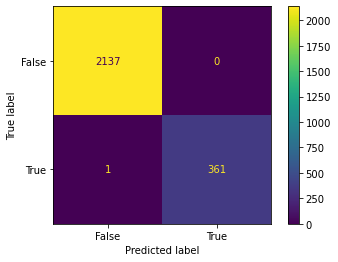

In [77]:
# Create a random forest model
rmf = RandomForestClassifier(n_estimators=100, random_state=12)

# Fit the model to the training data
rmf_model=rmf.fit(X_train, y_train)


# Make predictions on the test data
y_hat_train = rmf.predict(X_train)

# Evaluate the model
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals).value_counts(normalize=True))

#classification report and confusion matrix
report = classification_report(y_train, y_hat_train)
print("Classification Report:\n", report)

cf = confusion_matrix(y_train, y_hat_train)
print("Confusion Matrix:\n", cf)
cm = ConfusionMatrixDisplay(confusion_matrix = cf,display_labels = [False, True])
cm.plot()
plt.show()

0.0    0.902878
1.0    0.097122
dtype: float64
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94       713
         1.0       0.63      0.81      0.71       121

    accuracy                           0.90       834
   macro avg       0.80      0.86      0.82       834
weighted avg       0.92      0.90      0.91       834

Confusion Matrix:
 [[655  58]
 [ 23  98]]


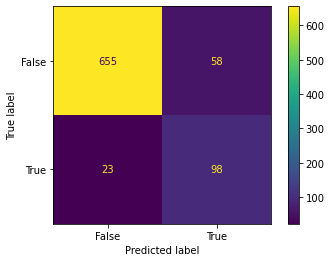

In [78]:

# Make predictions on the test data
y_hat_test = rmf.predict(X_test)

# Evaluate the model
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals).value_counts(normalize=True))

#classification report and confusion matrix
report = classification_report(y_test, y_hat_test)
print("Classification Report:\n", report)

cf = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:\n", cf)
cm = ConfusionMatrixDisplay(confusion_matrix = cf,display_labels = [False, True])
cm.plot()
plt.show()

Our Random forest model seems to be doing well even without tuning, let us now compare the random forest model against the 
logistic regression model

## Model comparison 

Auc for the random forest is: 0.9152457895285895
Auc for the random forest is: 0.8041333905161523


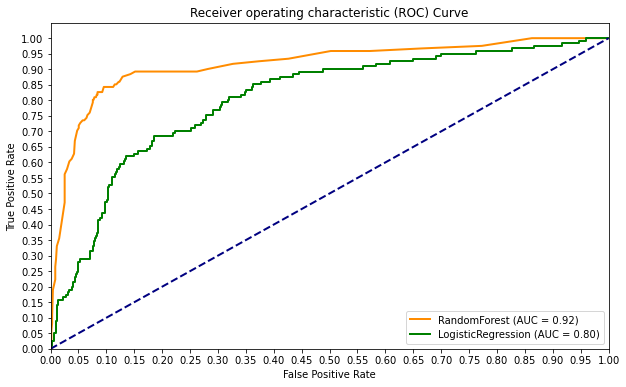

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Deriving probabilities
rmf_probabilities = rmf.predict_proba(X_test)[:, 1]
best_logreg_probabilities = best_logreg.predict_proba(X_test)[:, 1]

# Getting ROC curves
rmf_fpr, rmf_tpr, _ = roc_curve(y_test, rmf_probabilities)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, best_logreg_probabilities)

# Getting AUC
rmf_auc = auc(rmf_fpr, rmf_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)
print(f'Auc for the random forest is: {rmf_auc}')
print(f'Auc for the random forest is: {logreg_auc}')

# Plotting ROC curves for Random Forest and Logistic Regression

plt.figure(figsize=(10, 6))
lw = 2
colors = ['darkorange', 'green'] 

plt.plot(rmf_fpr, rmf_tpr, color=colors[0], lw=lw, label=f'RandomForest (AUC = {rmf_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, color=colors[1], lw=lw, label=f'LogisticRegression (AUC = {logreg_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()





As we can observe, the AUC of the Random forest is still higher than the one for the logistic Regression but they both 
have very good AUC and ROC values

# Conclusion 

- **Model Suitability**: Both models are suitable for churning predictions, but Random Forest stands out with an AUC of 0.92 and a weighted average accuracy of 90%.

- **Customer Service Calls**: There is a clear correlation between the number of customer service calls and the likelihood of churn. The more customer service calls a customer makes, the more likely they are to churn.

- **Calling Charges Impact**: Reducing calling charges is expected to have a positive effect on reducing the churn rate. Lower charges may make customers less likely to terminate their contracts.

- **International Users**: Interestingly, international users appear to have a lower incidence of churning. This suggests that international plan subscribers may be more loyal or satisfied with their service.


# Recommendations


- **Model Selection**: Given that Random Forest outperformed other models with an AUC of 0.92 and a 90% weighted average accuracy, it is recommended to prioritize the use of Random Forest for churning predictions.

- **Customer Service Enhancement**: To reduce churn, consider enhancing the customer service experience, as a higher number of customer service calls appears to correlate with increased churn. This could involve improving support, response times, or providing additional support resources.

- **Pricing Strategy**: To mitigate churn, consider implementing a pricing strategy that includes reducing calling charges. Lower charges can make the service more cost-effective for customers and potentially reduce the likelihood of contract terminations.

- **Promote International Plans**: Given that international users have a lower incidence of churning, consider promoting international calling plans. This could include marketing and incentivizing international plans to retain more customers and increase loyalty among subscribers.
